<a href="https://colab.research.google.com/github/Trosadventures/QUANTITATIVE23/blob/main/ML_fundamentals_nov_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm

## ARDL in Python

In [5]:
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.stattools import adfuller

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ibex_df = pd.read_csv("/content/drive/MyDrive/ibex5y.csv",
                      delimiter=';')
ibex_df.head(3)

,Date,Price
0,14/11/2018,9106.599609
1,15/11/2018,9073.500000
2,16/11/2018,9056.799805


In [ ]:
ibex_df = ibex_df[['Price']]
ibex_df

,Price
0,9106.599609
1,9073.500000
2,9056.799805
3,9006.299805
4,8866.500000
...,...
1276,9235.900391
1277,9283.799805
1278,9405.200195
1279,9371.700195


In [ ]:
ibex_df[['log_returns']] = np.log(ibex_df[['Price']]) - np.log(ibex_df[['Price']]).shift(1)
ibex_df.head(3)

,Price,log_returns
0,9106.599609,NaN
1,9073.500000,-0.003641
2,9056.799805,-0.001842


In [ ]:
ibex_df[['sq_log_returns']] = ibex_df[['log_returns']]**2
ibex_df.head(3)

,Price,log_returns,sq_log_returns
0,9106.599609,NaN,NaN
1,9073.500000,-0.003641,0.000013
2,9056.799805,-0.001842,0.000003


In [ ]:
ibex_df = ibex_df.dropna()
ibex_df.head(3)

,Price,log_returns,sq_log_returns
1,9073.500000,-0.003641,0.000013
2,9056.799805,-0.001842,0.000003
3,9006.299805,-0.005592,0.000031


In [ ]:
adfuller(ibex_df[['log_returns']])[1]

7.981878475855288e-16

In [ ]:
adfuller(ibex_df[['sq_log_returns']])[1]

5.743885766792155e-13

In [ ]:
modelo_adl = ARDL(ibex_df[['log_returns']],3,
                  ibex_df[['sq_log_returns']],3).fit()
print(modelo_adl.summary())

                              ARDL Model Results                              
Dep. Variable:            log_returns   No. Observations:                 1278
Model:                     ARDL(3, 3)   Log Likelihood                3802.317
Method:               Conditional MLE   S.D. of innovations              0.012
Date:                Mon, 27 Nov 2023   AIC                          -7586.634
Time:                        14:49:23   BIC                          -7540.278
Sample:                             3   HQIC                         -7569.225
                                 1278                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0006      0.000      1.740      0.082   -8.16e-05       0.001
log_returns.L1        0.0174      0.028      0.626      0.532      -0.037       0.072
log_returns.L2        0.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
modelo_adl = ARDL(ibex_df[['log_returns']],3,
                  ibex_df[['sq_log_returns']],3,
                  causal=True).fit()
print(modelo_adl.summary())

                              ARDL Model Results                              
Dep. Variable:            log_returns   No. Observations:                 1278
Model:                     ARDL(3, 3)   Log Likelihood                3739.232
Method:               Conditional MLE   S.D. of innovations              0.013
Date:                Mon, 27 Nov 2023   AIC                          -7462.464
Time:                        14:49:50   BIC                          -7421.258
Sample:                             3   HQIC                         -7446.988
                                 1278                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0001      0.000      0.322      0.747      -0.001       0.001
log_returns.L1        0.0246      0.029      0.842      0.400      -0.033       0.082
log_returns.L2        0.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
sm.stats.acorr_ljungbox(modelo_adl.resid,
                        lags=5)


,lb_stat,lb_pvalue
1,0.001289,0.971360
2,0.141410,0.931737
3,0.214123,0.975278
4,1.364027,0.850423
5,1.999022,0.849280


In [ ]:
modelo_adl.forecast()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


1278    0.00005
dtype: float64

# Import advertising dataset

In [7]:
advertising_df = pd.read_csv("drive/MyDrive/Advertising.csv")
advertising_df.head(3)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [8]:
advertising_df = advertising_df.iloc[:,1:]

In [9]:
advertising_df.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [10]:
n = len(advertising_df)
print (n)

200


## Linear regression

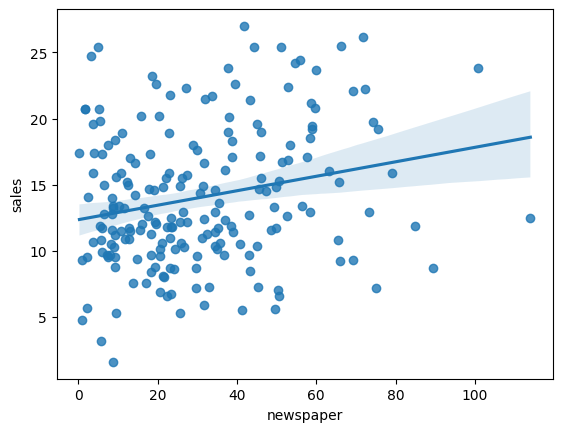

In [11]:
sns.regplot(x="newspaper",
            y="sales",
            data=advertising_df);

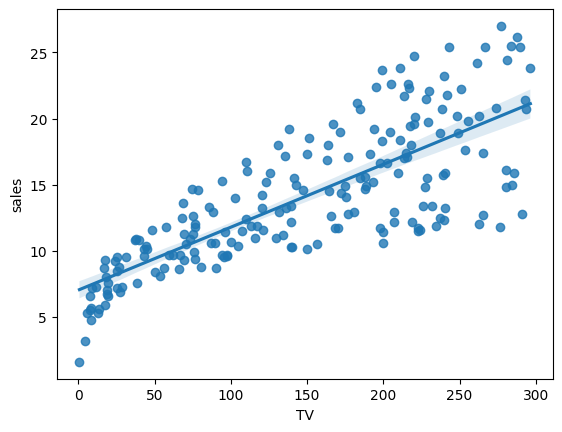

In [12]:
sns.regplot(x="TV",
            y="sales",
            data=advertising_df);

<Axes: xlabel='radio', ylabel='sales'>

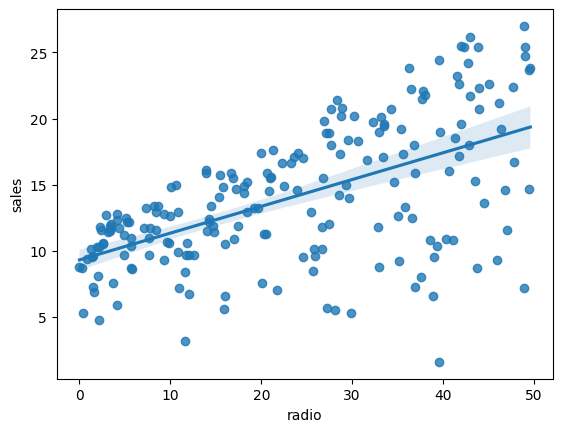

In [13]:
sns.regplot(x="radio",
            y="sales",
            data=advertising_df)

In [14]:
advertising_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
advertising_df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

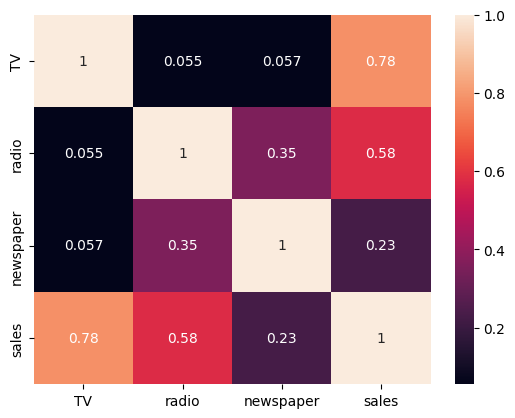

In [17]:
sns.heatmap(advertising_df.corr(), annot=True)

In [18]:
import statsmodels.formula.api as smf
model = smf.ols('sales ~ TV',
                data=advertising_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           1.47e-42
Time:                        14:28:15   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

Sales = B1 + B0 + ut


H10 : 0 so we reject
H

In [19]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [20]:
model.rsquared_adj

0.6099148238341623

In [21]:
model.bic

1048.687962269444

In [24]:
model.resid

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
         ...   
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: float64

**Dataframe with observations from X for which you want to compute the prediction for model.predict** ()

In [25]:
df_for_prediction = pd.DataFrame({'TV':[215]})
df_for_prediction

,TV
0,215


In [23]:
df_predict = pd.DataFrame({'TV':[215]})
model.predict(df_predict)

0    17.252971
dtype: float64

**We get the exact prediction as df_predict as using model.params as shown below**

In [26]:
model.params[0] + model.params[1]*215

17.25297124222695

In [27]:
advertising_df['sales'] - model.predict(advertising_df['TV'])

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
         ...   
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: float64

In [29]:
model.resid

0      4.129225
1      1.252026
2      1.449776
3      4.265605
4     -2.727218
         ...   
195   -1.248493
196   -1.810545
197   -2.646579
198    4.986015
199   -4.665848
Length: 200, dtype: float64

TRAINING AND TESTING

In [30]:
np.mean(model.resid)

-6.892264536872972e-15

In [32]:
rss= np.sum(model.resid**2)
print(rss)

2102.530583131351


TRAINING MSE = Training rss/n

In [33]:
rss/n

10.512652915656753

In [34]:
rss/(n-2)

10.618841328946216

**Can we use Radio to confirm hypothesis?**

In [35]:
import statsmodels.formula.api as smf
model = smf.ols('sales ~ radio',
                data=advertising_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           4.35e-19
Time:                        14:58:53   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

**P-value for radio (above)is 0, So we reject the hypothesis**

In [37]:
df_for_prediction = pd.DataFrame({'radio':[215]})
df_for_prediction

,radio
0,215


In [38]:
df_predict = pd.DataFrame({'radio':[215]})
model.predict(df_predict)

0    52.848232
dtype: float64

In [39]:
model.params[0] + model.params[1]*215

52.84823152453285

In [40]:
advertising_df['sales'] - model.predict(advertising_df['radio'])

0      5.134021
1     -6.869722
2     -9.306195
3      0.825286
4      1.401407
         ...   
195   -2.460872
196   -0.603867
197    1.605151
198    7.683539
199    2.346898
Length: 200, dtype: float64

In [41]:
model.resid

0      5.134021
1     -6.869722
2     -9.306195
3      0.825286
4      1.401407
         ...   
195   -2.460872
196   -0.603867
197    1.605151
198    7.683539
199    2.346898
Length: 200, dtype: float64

In [42]:
np.mean(model.resid)

-3.2152058793144534e-15

In [43]:
rss= np.sum(model.resid**2)
print(rss)

3618.479549025087


In [44]:
rss/n

18.092397745125435

In [45]:
rss/(n-2)

18.27514923750044

In [ ]:
n = len(advertising_df)
print(n)

In [ ]:
np.sum((advertising_df['sales'] - model.predict(advertising_df['TV']))**2) / (n-2)

In [ ]:
model.mse_resid

In [ ]:
np.mean(model.resid)

Validation Set

In [46]:
n_train = int(0.7*n)
print('Observations in training set: ' + str(n_train))
n_test = n - n_train
print('Observations in test set: ' + str(n_test))

Observations in training set: 140
Observations in test set: 60


In [47]:
advertising_df = advertising_df.sample(frac=1)
advertising_df

,TV,radio,newspaper,sales
133,219.8,33.5,45.1,19.6
103,187.9,17.2,17.9,14.7
197,177.0,9.3,6.4,12.8
139,184.9,43.9,1.7,20.7
140,73.4,17.0,12.9,10.9
...,...,...,...,...
183,287.6,43.0,71.8,26.2
128,220.3,49.0,3.2,24.7
119,19.4,16.0,22.3,6.6
165,234.5,3.4,84.8,11.9


In [48]:
train_split_df = advertising_df[['sales','TV']].iloc[0:n_train,]
train_split_df

,sales,TV
133,19.6,219.8
103,14.7,187.9
197,12.8,177.0
139,20.7,184.9
140,10.9,73.4
...,...,...
1,10.4,44.5
152,16.6,197.6
76,6.9,27.5
77,14.2,120.5


from matplotlib import pyplot as plt
train_split_df['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_split_df['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_split_df.plot(kind='scatter', x='sales', y='TV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
train_split_df['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
train_split_df['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

In [49]:
test_split_df = advertising_df[['sales','TV']].iloc[0:n_train:,]
test_split_df.head(3)

,sales,TV
133,19.6,219.8
103,14.7,187.9
197,12.8,177.0


In [50]:
test_split_df = advertising_df[['sales','TV']].iloc[n_train:,]
test_split_df

,sales,TV
162,14.9,188.4
38,10.1,43.1
49,9.7,66.9
112,14.1,175.7
137,20.8,273.7
39,21.5,228.0
105,19.2,137.9
113,15.9,209.6
179,12.6,165.6
74,17.0,213.4


In [51]:
model = smf.ols('sales ~ TV',
                data=train_split_df).fit()
print(model.summary())
print(model.mse_resid)


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     232.4
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           2.22e-31
Time:                        15:20:20   Log-Likelihood:                -361.91
No. Observations:                 140   AIC:                             727.8
Df Residuals:                     138   BIC:                             733.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7558      0.551     12.258      0.0

Predicting MSE

In [52]:
y_pred = model.predict(test_split_df['TV'])
np.sum((test_split_df['sales'] - model.predict(test_split_df['TV']))**2) / (n_test-2)

11.45401696090171

The figure above 11.45, estimates of test MSE using validation set approach

2-FOLD CROSS VALIDATION

In [53]:
fold_edges = np.linspace(0,n,2+1,
                         dtype=int)
fold_edges

array([  0, 100, 200])

In [54]:
fold_1_df = advertising_df[['sales','TV']].iloc[0:fold_edges[1],]
fold_1_df

,sales,TV
133,19.6,219.8
103,14.7,187.9
197,12.8,177.0
139,20.7,184.9
140,10.9,73.4
...,...,...
61,24.2,261.3
159,12.9,131.7
24,9.7,62.3
150,16.1,280.7


In [55]:
fold_2_df = advertising_df[['sales','TV']].iloc[fold_edges[1]:fold_edges[2],]
fold_2_df

,sales,TV
66,9.5,31.5
67,13.4,139.3
42,20.7,293.6
30,21.4,292.9
146,13.2,240.1
...,...,...
183,26.2,287.6
128,24.7,220.3
119,6.6,19.4
165,11.9,234.5


In [57]:
model = smf.ols('sales ~ TV',
                data=fold_2_df).fit()

print(model.summary())

y_true = fold_2_df['sales']
y_pred = model.predict(fold_2_df['TV'])
mse_fold_1 = np.sum((y_true - y_pred)**2) / len(y_true)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     165.7
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           8.66e-23
Time:                        16:14:33   Log-Likelihood:                -260.31
No. Observations:                 100   AIC:                             524.6
Df Residuals:                      98   BIC:                             529.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1873      0.628     11.446      0.0

3-fold Cross Validation

LOOCV